In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.distributions as D

import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rcParams

import scanpy as sc
import math

In [2]:
sc.set_figure_params(dpi=80, figsize=(6,6))
sns.set_style("darkgrid")

In [3]:
class Normal():
    def __init__(self, mu, std):
        self.mu = mu
        self.std = std

    def pdf(self, k):
        return torch.exp(-((k - self.mu)** 2) / (2 * self.std**2)) / (self.std * torch.sqrt(torch.tensor(2 * torch.pi))) 


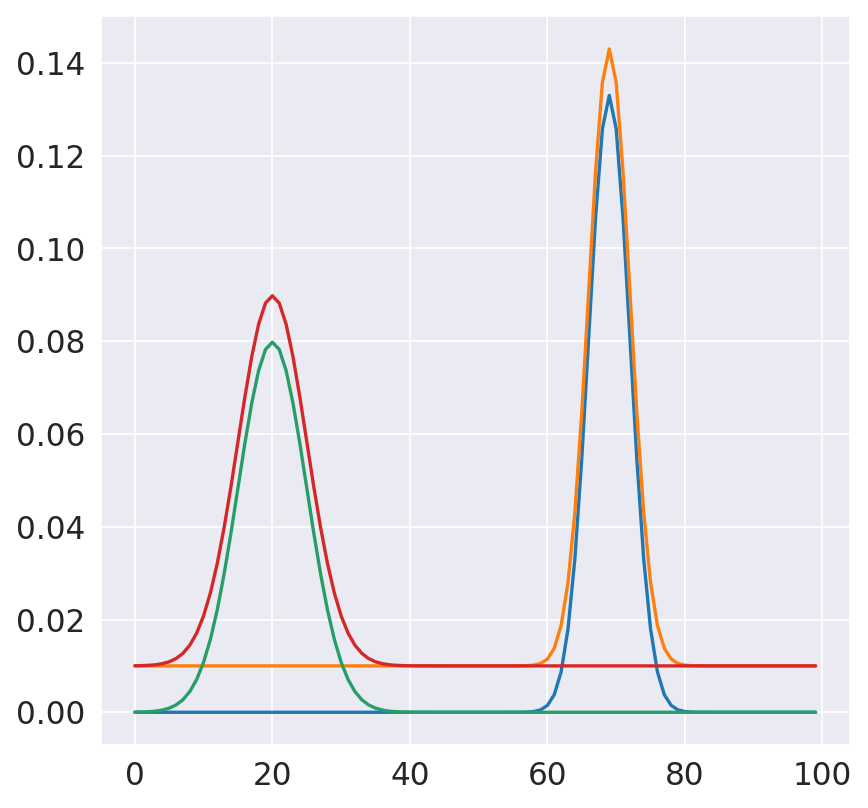

In [4]:
n11 = D.Normal(69, 3)
n12 = Normal(69,3)

n21 = D.Normal(20, 5)
n22 = Normal(20,5)

xx = torch.arange(0, 100)
ax = sns.lineplot(x=xx, y=n11.log_prob(xx).exp())
sns.lineplot(x=xx, y=n12.pdf(xx)+0.01, ax=ax)
sns.lineplot(x=xx, y=n21.log_prob(xx).exp(),ax=ax)
sns.lineplot(x=xx, y=n22.pdf(xx)+0.01, ax=ax)
plt.show()

In [5]:
mix = D.Categorical(torch.tensor([1000, 500]))
comp = D.Normal(torch.tensor([69*1000, 20*500]), torch.tensor([3*1000, 5 * 500]))
gmm = D.MixtureSameFamily(mix, comp)

In [6]:
lib_size = 3000
weights = torch.tensor([0.3, 0.2, 0.5])

tensor(436.1193)


<AxesSubplot:ylabel='Density'>

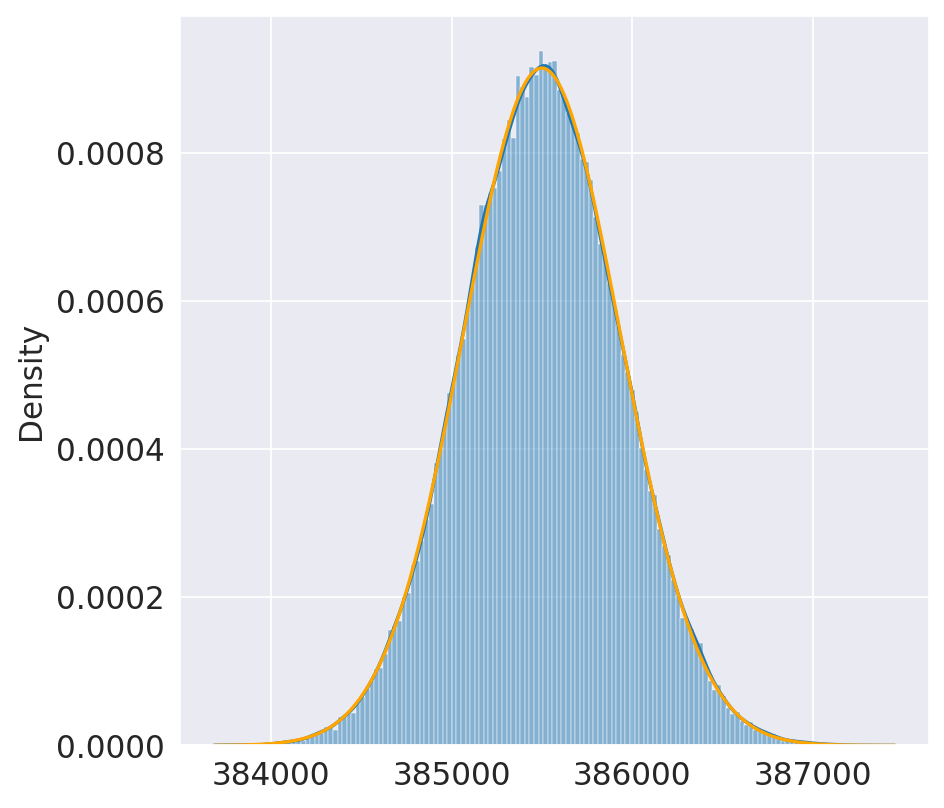

In [11]:
n1 = D.Normal(69, 13)
n2 = D.Normal(39, 1)
n3 = D.Normal(200, 5)

y1 = n1.sample((900,100000)).sum(0)
y2 = n2.sample((600,100000)).sum(0)
y3 = n3.sample((1500,100000)).sum(0)
y = y1 + y2 + y3

ax = sns.histplot(y, stat="density", kde=True)
xx = torch.arange(y.min(), y.max())
mu = lib_size * torch.sum(weights * torch.tensor([n1.mean, n2.mean, n3.mean]), -1)

# std = np.sqrt(1000 * n1.scale**2 + 500 * n2.scale**2 + 1000 * n3.scale**2)
std = torch.sqrt(lib_size * torch.sum(torch.tensor([n1.scale, n2.scale, n3.scale])**2 * weights))
print(std)

sns.lineplot(x=xx, y=Normal(mu, std).pdf(xx), ax=ax, color="orange")